In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [8]:
Fraud.shape

(492, 31)

In [9]:
print(type(Fraud))

<class 'pandas.core.frame.DataFrame'>


In [10]:
Normal.shape

(284315, 31)

In [11]:
df.groupby('Class').min()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0
1,406.0,-30.55238,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.0


In [12]:
new_df = pd.concat([Normal, Fraud], axis=0) # different dataset(Normal, Fraud) together

In [13]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [15]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [17]:
new_df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
89515.0      1
89516.0      1
89519.0      1
89520.0      1
169142.0     1
Name: count, Length: 124592, dtype: int64

# Using Normalization (Scale down the values of the features from 0 to 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:

scaler = MinMaxScaler()



In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
# Convert back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
# Combine the scaled data with the 'Class' column
new_df_scaled = pd.concat([X_scaled, Y], axis=1)

In [23]:
new_df_scaled # Convert Back to DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.978876,0.925541,0.779136,0.759117,0.329475,0.755171,0.242806,0.259977,0.792864,0.391646,...,0.574031,0.495141,0.674930,0.342499,0.608078,0.554231,0.421913,0.316127,0.015180,0
284803,0.980063,0.981714,0.780863,0.750697,0.314516,0.768696,0.249683,0.256746,0.788051,0.423943,...,0.567454,0.511348,0.663271,0.371313,0.607201,0.546239,0.423694,0.316911,0.000030,0
284804,0.980086,0.946807,0.779143,0.799053,0.272690,0.758173,0.262986,0.251741,0.798367,0.440311,...,0.573599,0.548942,0.668269,0.386556,0.536386,0.502403,0.423619,0.317068,0.003032,0
284805,0.983645,0.905394,0.773440,0.743844,0.332480,0.760057,0.233425,0.251904,0.796742,0.406549,...,0.570882,0.497472,0.658660,0.357486,0.559486,0.524456,0.432844,0.307976,0.009536,0


In [24]:
new_df_scaled['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0)

# Fit and transform the training data to remove low-variance features
X_train_selected = selector.fit_transform(X_train)

X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns)

# Print the number of selected columns
print(len(selected_columns))

30


In [27]:
for i in selected_columns:
    print(i)

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


In [28]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_selected_df, Y_train)
print(mutual_info)

In [94]:
mutual_info = pd.Series(mutual_info, index=selected_columns)
mutual_info.index = X_train_selected_df.columns
mutual_info_series = mutual_info.sort_values(ascending = False)
print(mutual_info_series)

V17       2.046689e-04
V10       1.965291e-04
V18       1.498297e-04
V5        1.082927e-04
V19       9.217882e-05
V23       8.570028e-05
V9        5.553627e-05
V15       5.478672e-05
V2        5.360279e-05
V27       4.161096e-05
V20       3.973624e-05
V21       3.566147e-05
V1        3.404804e-05
V28       2.949280e-05
V8        2.800091e-05
V16       2.750388e-05
V11       2.504366e-05
V14       2.472409e-05
V22       2.252036e-05
V12       2.220323e-05
V24       1.318292e-05
Amount    9.982916e-08
V13       0.000000e+00
V7        0.000000e+00
V6        0.000000e+00
V25       0.000000e+00
V26       0.000000e+00
V4        0.000000e+00
V3        0.000000e+00
Time      0.000000e+00
dtype: float64


In [95]:
top_features = mutual_info_series.head(10).index

In [96]:
X_train_top_features = X_train_selected_df[top_features]
X_test_top_features = X_test_selected_df[top_features]


In [97]:
print("Top features based on mutual information:")
for feature in top_features:
    print(feature)


Top features based on mutual information:
V17
V10
V18
V5
V19
V23
V9
V15
V2
V27


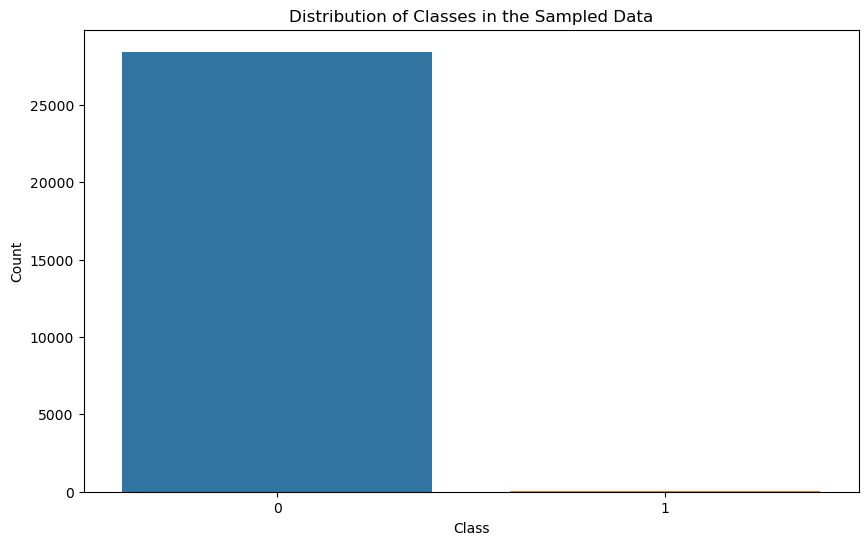

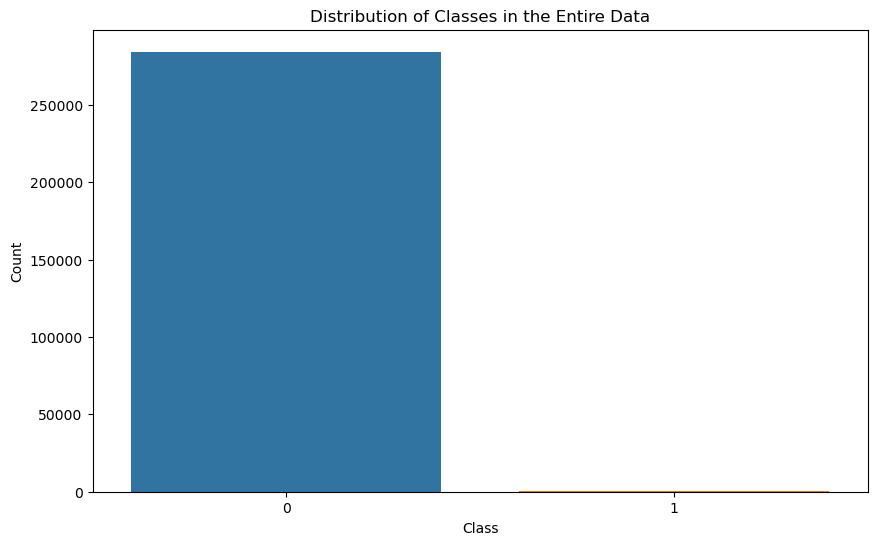

In [100]:
import seaborn as sns

sample_df = new_df_scaled.sample(frac=0.1, random_state=42)  # Adjust 'frac' as needed

# Plot the distribution of the 'Class' column to visualize the imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=sample_df)
plt.title('Distribution of Classes in the Sampled Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# If you want to visualize the entire dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=new_df_scaled)
plt.title('Distribution of Classes in the Entire Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

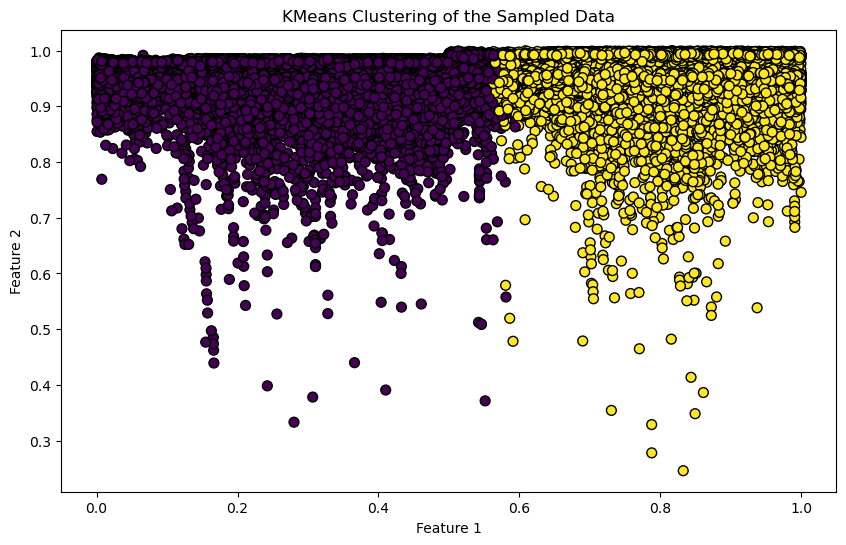

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'new_df_scaled' is your scaled DataFrame and 'Class' is your target column

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample from your dataset
sample_frac = 0.5  # Adjust the fraction of the sample as needed
sample_df = new_df_scaled.sample(frac=sample_frac, random_state=42)

# Separate features and target
X_sample = sample_df.drop(columns='Class')
y_sample = sample_df['Class']

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_sample)
labels = kmeans.labels_

# Add cluster labels to the sample DataFrame
sample_df['Cluster'] = labels

# Visualize the feature space of the sampled data with clusters (e.g., using the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_sample.iloc[:, 0], X_sample.iloc[:, 1], c=labels, edgecolor='k', s=50, cmap='viridis')
plt.title('KMeans Clustering of the Sampled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
